### 1. Inspecting transfusion.data file

Blood transfusion saves lives - from replacing lost blood during major surgery or a serious injury to treating various illnesses and blood disorders. Ensuring that there's enough blood in supply whenever needed is a serious challenge for the health professionals. According to WebMD, "about 5 million Americans need a blood transfusion every year".

Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus.

The data is stored in datasets/transfusion.data and it is structured according to RFMTC marketing model (a variation of RFM). We'll explore what that means later in this notebook. First, let's inspect the data.

In [6]:
f=open("transfusion.data","r")
f.read()[0:1000]

'Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),"whether he/she donated blood in March 2007"\n2 ,50,12500,98 ,1\n0 ,13,3250,28 ,1\n1 ,16,4000,35 ,1\n2 ,20,5000,45 ,1\n1 ,24,6000,77 ,0\n4 ,4,1000,4 ,0\n2 ,7,1750,14 ,1\n1 ,12,3000,35 ,0\n2 ,9,2250,22 ,1\n5 ,46,11500,98 ,1\n4 ,23,5750,58 ,0\n0 ,3,750,4 ,0\n2 ,10,2500,28 ,1\n1 ,13,3250,47 ,0\n2 ,6,1500,15 ,1\n2 ,5,1250,11 ,1\n2 ,14,3500,48 ,1\n2 ,15,3750,49 ,1\n2 ,6,1500,15 ,1\n2 ,3,750,4 ,1\n2 ,3,750,4 ,1\n4 ,11,2750,28 ,0\n2 ,6,1500,16 ,1\n2 ,6,1500,16 ,1\n9 ,9,2250,16 ,0\n4 ,14,3500,40 ,0\n4 ,6,1500,14 ,0\n4 ,12,3000,34 ,1\n4 ,5,1250,11 ,1\n4 ,8,2000,21 ,0\n1 ,14,3500,58 ,0\n4 ,10,2500,28 ,1\n4 ,10,2500,28 ,1\n4 ,9,2250,26 ,1\n2 ,16,4000,64 ,0\n2 ,8,2000,28 ,1\n2 ,12,3000,47 ,1\n4 ,6,1500,16 ,1\n2 ,14,3500,57 ,1\n4 ,7,1750,22 ,1\n2 ,13,3250,53 ,1\n2 ,5,1250,16 ,0\n2 ,5,1250,16 ,1\n2 ,5,1250,16 ,0\n4 ,20,5000,69 ,1\n4 ,9,2250,28 ,1\n2 ,9,2250,36 ,0\n2 ,2,500,2 ,0\n2 ,2,500,2 ,0\n2 ,2,500,2 ,0\n2 ,11,2750,46 ,0\n2 

### 2. Loading the blood donations data
We now know that we are working with a typical CSV file (i.e., the delimiter is ,, etc.). We proceed to loading the data into memory.

In [7]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in dataset
transfusion = pd.read_csv('transfusion.data')

# No. of rows and columns
print(transfusion.shape)
# Print out the first rows of our dataset
transfusion.head()

(748, 5)


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [8]:
## change columns name:
newColName=["Recency","Frequency","Monetary","Time","Class"]
transfusion.set_axis(newColName,axis=1,inplace=True)
transfusion.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


### 3. Inspecting transfusion DataFrame
Let's briefly return to our discussion of RFM model. RFM stands for Recency, Frequency and Monetary Value and it is commonly used in marketing for identifying your best customers. In our case, our customers are blood donors.

RFMTC is a variation of the RFM model. Below is a description of what each column means in our dataset:

- **Recency**: months since the last donation
- **Frequency**: total number of donation
- **Monetary**: total blood donated in c.c.
- **Time**: months since the first donation
- **Class**: a binary variable representing whether he/she donated blood in March 2007 (1 stands for donating blood; 0 stands for not donating blood

It looks like every column in our DataFrame has the numeric type, which is exactly what we want when building a machine learning model. Let's verify our hypothesis.

In [9]:
# Print a concise summary of transfusion DataFrame
print(transfusion.dtypes)
transfusion.describe()

Recency      int64
Frequency    int64
Monetary     int64
Time         int64
Class        int64
dtype: object


,Recency,Frequency,Monetary,Time,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [14]:
## missing values 
transfusion.isnull().sum()

Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64

### 4. Outliers detection 
Outliers can have a dramatic effect on the prediction espacially for regression problems.The Tukey method (Tukey JW., 1977) is used to detect ouliers which defines an interquartile range comprised between the 1st and 3rd quartile of the distribution values (IQR). An outlier is a row that have a feature value outside the (IQR +- an outlier step).

First outliers from each feature of the dateset are seperately detected. Then, a row with at least two feature related outliers will be dropped from the dataset.

In [15]:
# import required libraries
from collections import Counter

# Outlier detection 
def detect_outliers(df,n,features):
    """
    Takes a dataframe of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers  

In [17]:
# detect outliers 
Outliers_to_drop = detect_outliers(transfusion,2,newColName[:-1])
transfusion.iloc[Outliers_to_drop,:]

,Recency,Frequency,Monetary,Time,Class


There is no outlier in the dataset.

### 5. Creating target and predictors

In [18]:
# target variable
y=transfusion["Class"]
# predictors
X=transfusion.drop("Class",axis=1)

### 6. Logistic regression model with stratified k-fold cross validation 

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve,auc
from sklearn.model_selection import train_test_split

In Machine Learning, performance measurement is an essential task. So when it comes to a classification problem, we can count on an AUC - ROC Curve. When we need to check or visualize the performance of the multi - class classification problem, we use AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve. It is one of the most important evaluation metrics for checking any classification model’s performance.

ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

In [20]:
## Receiver operating characteristic (ROC) plot
def ROC (tpr,fpr,roc_auc):
    plt.plot(tpr, fpr, color='r',label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([-0.01,1.01]); plt.ylim([-0.01,1.01])
    plt.xticks(np.arange(0,1.1,.1)); plt.yticks(np.arange(0,1.1,.1))
    plt.xlabel('False positive rate (1-Specificity)')
    plt.ylabel('True positive rate (Sensitivity)')
    plt.legend(loc="lower right")
    plt.grid()

In [21]:
## confusion matrix plot
def plot_cm(y_test, y_est):
    cm = confusion_matrix(y_test, y_est);
    accuracy = np.round(100*cm.diagonal().sum()/cm.sum(),2); error_rate = np.round(100-accuracy,2)
    plt.imshow(cm, cmap='binary', interpolation='None')
    plt.colorbar()
    #plt.xticks(range(C)); plt.yticks(range(C));
    plt.xlabel('Predicted class'); plt.ylabel('Actual class');
    plt.title('Confusion matrix (Accuracy: {0}%, Error Rate: {1}%)'.format(accuracy, error_rate));

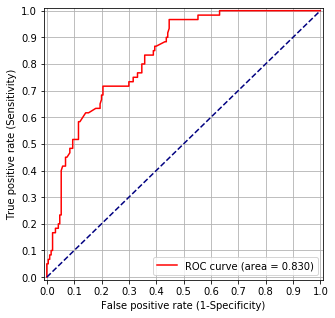

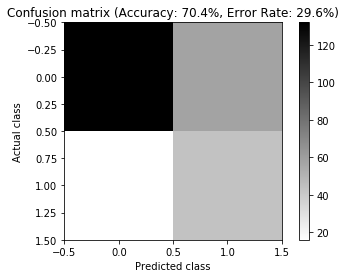

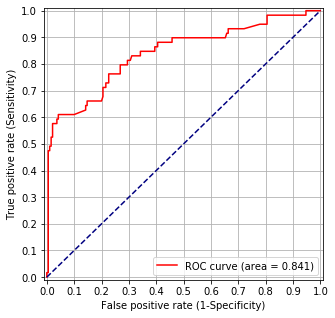

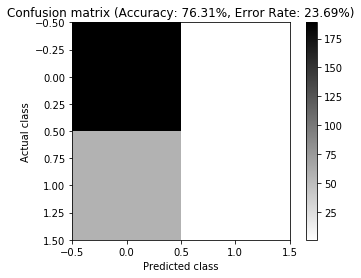

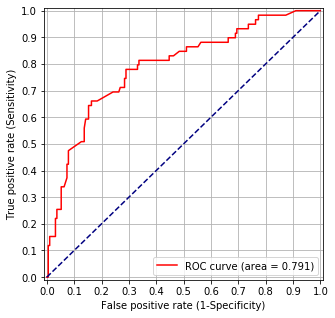

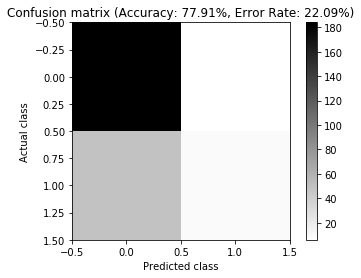

In [22]:
# K-fold crossvalidation
K = 3
"""Use StratifiedKFold method to ensure that training and test sets 
have roughly equal class proportions (stratification)"""

""" pd.value_counts(np.array(y_train).flatten())/len(y_train)== 
pd.value_counts(np.array(y_test).flatten())/len(y_test)"""

CV = StratifiedKFold(K)

k=1
for train_index, test_index in CV.split(X,y):

    # extract training and test set for current CV fold
    X_train, y_train = X.iloc[train_index,:], y[train_index]
    X_test, y_test = X.iloc[test_index,:], y[test_index]

    logit_classifier = LogisticRegression(solver="lbfgs", max_iter=1000)
    logit_classifier.fit(X_train, np.array(y_train).flatten())

    y_test_est = np.array(logit_classifier.predict(X_test)).flatten()
    ## Predicted probabilities for the label of 1     
    p = logit_classifier.predict_proba(X_test)[:,1]
    ## Predicted probabilities for the label of 0
    #1-p=logit_classifier.predict_proba(X_test)[:,0]
    tpr=roc_curve(y_test,p)[0] # True Positive rate
    fpr=roc_curve(y_test,p)[1] # False Positive rate
    AUC=auc(tpr,fpr)    # Area under Curve
    
    plt.figure(figsize=(5,5))    
    plt.figure(k)
    ROC(tpr,fpr,AUC)  
    
    plt.figure(k+1)      
    plot_cm(y_test,y_test_est)
    
    k+=2

### 7. Logistic regression model and bootstrap aggregation (bagging) algorithm

The script fits an ensemble of logistic regression models to the data, using the bootstrap aggregation (bagging) algorithm. Use L = 100 bootstrap samples. This requires creating 100 bootstrapped training sets, fit a logistic regression model to each, and combine the results of their outputs to make the final classification. 

In [23]:
# target variable
y=transfusion["Class"]
# predictors
X=transfusion.drop("Class",axis=1)

In [24]:
from sklearn.utils import resample
# data sample

def bootstrap_sampling(df,target,N):
    boot_df = resample(df, replace=True, n_samples=N)
    X_train=boot_df.drop(target,1)
    y_train=boot_df[target]
    return (X_train,y_train)

In [38]:
N=X.shape[0]
ErrorRate=[]
AccuracyRate=[]

treshold=0.5
# Number of rounds of bagging
L=100
for l in range(L):
    X_train,y_train=bootstrap_sampling(transfusion,"Class",N)
    logit_classifier = LogisticRegression(solver="lbfgs", max_iter=1000)
    logit_classifier.fit(X_train, np.array(y_train).flatten())
    ## Predicted probabilities for the label of 1     
    P= logit_classifier.predict_proba(X)[:,1] 
    y_est=[]
    for p in P:
        if p>treshold:
            y_est.append(1)
        else:
            y_est.append(0)           
    #y_est = logit_classifier.predict(X)
    count=0
    for a,b in zip(y,y_est):
        if a!=b:
            count+=1
    #print('Accuracy: {:.2f}%'.format(100-count/len(y)*100),",",'Error rate: {:.2f}%'.format(count/len(y)*100))    
    ErrorRate.append(count/len(y))
    AccuracyRate.append(1-count/len(y))

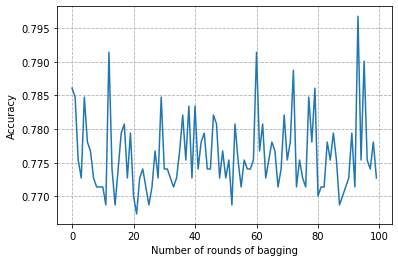

In [36]:
plt.plot(range(len(AccuracyRate)),AccuracyRate)
plt.xlabel("Number of rounds of bagging")
plt.ylabel("Accuracy")
plt.grid(linestyle="--")

### 8. Logistic regression model and boosting algorithm

The above script has been modified so that boosting is used instead of bagging. The script fits an ensemble of logistic regression models to the data, using the AdaBoost algorithm. Notice the script uses L = 100 rounds of boosting. This requires creating a randomly chosen training set, fit a logistic regression model to it, evaluate
its performance and update the weights accordingly, and compute a classifer importance. This process is repeated L = 100 times, and ultimately the trained ensemble of classifiers is combined to make a final classifcation. Compute the error rate (on the training set) and make a plot of the decision boundary.

In [32]:
def bootstrap_sampling2(df,target,N,weights=None):
    if np.any(weights==None):
        weights=np.repeat(1/len(df),len(df))
    selected_indices = np.random.choice(range(len(df)), size=(N), replace=True,p=weights)
    boot_df=df.loc[selected_indices,:]
    X_train=boot_df.drop(target,1)
    y_train=boot_df[target]
    return (X_train,y_train) 

In [65]:
L=100
N=transfusion.shape[0]
weights=np.repeat(1/len(transfusion),len(transfusion))
Error_rate=[]
alpha=[]
y_all= np.zeros((N,L))

for l in range(L):
        # Extract training set by random sampling with replacement from X and y
    while True : 
        # not a thing of beauty, however log.reg. fails if presented with less than two classes. 
        X_train, y_train = bootstrap_sampling2(transfusion,"Class",N,weights)
        if not (all(y_train==0) or all(y_train == 1)) : break   
    
    logit_classifier = LogisticRegression(solver="lbfgs", max_iter=1000)
    logit_classifier.fit(X_train, np.array(y_train).flatten())
    y_est = logit_classifier.predict(X)
    err=(y_est != np.array(y).flatten()).sum(dtype=float)/len(y_est)
    Error_rate.append(err)
    alphai = 0.5 * np.log( (1-err)/err)
    alpha.append(alphai)    
    weights[y_est == np.array(y).flatten()]=weights[y_est == np.array(y).flatten()]* np.exp(-alphai)
    weights[y_est != np.array(y).flatten()]=weights[y_est != np.array(y).flatten()]* np.exp(alphai)
    weights=weights / np.sum(weights)
    #print('Error rate: {:.2f}%'.format(err*100))
    y_all[:,l]=y_est    

print("---------Estimated value of class labels (using 0.5 as threshold) by majority voting----------")
##print(y_all.shape)
##print(y.shape)
Av= np.mean(y_all,axis=1)
Av[Av<0.5]=0
Av[Av>=0.5]=1
ErrorRateEnsemble= (Av==np.array(y).flatten()).sum(dtype=float)/len(Av)
print('Error rate for ensemble classifier: {:.2f}%'.format(ErrorRateEnsemble*100))
print('Accuracy for ensemble classifier: {:.2f}%'.format(100-ErrorRateEnsemble*100))

---------Estimated value of class labels (using 0.5 as threshold) by majority voting----------
Error rate for ensemble classifier: 23.13%
Accuracy for ensemble classifier: 76.87%
